In [1]:
# Import necessary library
import pandas as pd
from pandas.plotting import parallel_coordinates
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import contextily as ctx
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from factor_analyzer import Rotator
from scipy.stats import gmean

In [2]:
# Import data
merged_idn =  gpd.read_file("../data/merged_idn/merged_idn.shp")

In [4]:
# Drop null value
to_analyse = merged_idn.dropna()

In [5]:
# Filter needed columns only
usedvariables = ['pds_banjir', 'pds_banj_1', 'pds_minumb', 'pds_kopera', 'pds_credit',
                 'pds_sd', 'pds_puskes', 'pds_trayek', 'pds_road', 'pds_sinyal', 'pds_market', 
                 'pds_cacat', 'pds_kelahi', 'p0_gkn', 'p1_gkn', 'p2_gkn', 'gini', 'WANITA', 'TIDAK_BELU', 
                 'BELUM_TAMA', 'BELUM_TIDA', 'underage', 'oldies']
to_analyse_used = to_analyse[usedvariables]

In [7]:
# Standardize value input
sv_PCA = to_analyse_used
ss = StandardScaler()
sv_PCA_std = ss.fit_transform(sv_PCA)

pca_test = PCA()
pca_test.fit(sv_PCA_std)

PCA()

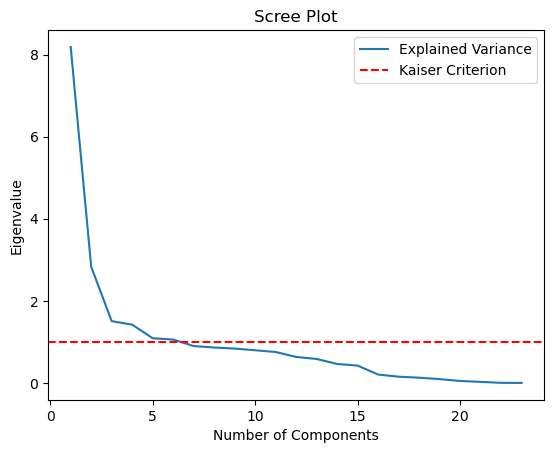

In [8]:
# Plot the Scree plot to find number of components
plt.plot(range (1 , len(pca_test.explained_variance_) + 1), pca_test.explained_variance_, label ='Explained Variance')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.axhline(y =1 , color ='r', linestyle ='--', label ='Kaiser Criterion') 
# Kaiser criterion line
plt.legend ( loc ='best')
#plt.savefig (scree_plot . png ’, dpi =300 , bbox_inches =’ tight ’)
plt.show ()

In [9]:
# Filter components using Kaiser Criterion
n_components = sum(pca_test.explained_variance_ >1)
print(n_components)

# Perform PCA with n_components number
pca = PCA(n_components=n_components)
pca_scores = pca.fit_transform(sv_PCA_std)

# Perform Rotator using varimax method
rotator = Rotator(method='varimax')
pca_scores = rotator.fit_transform(pca_scores)

6


In [10]:
# Create variables loadings DataFrame
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=usedvariables).T
loadings_df

,0,1,2,3,4,5
pds_banjir,0.042111,-0.078626,-0.144303,-0.379056,0.366516,-0.178878
pds_banj_1,-0.005945,-0.044151,-0.024340,-0.057409,0.611785,-0.500466
pds_minumb,0.109091,-0.119127,-0.145389,0.379878,-0.133077,-0.263991
pds_kopera,0.116541,-0.000315,0.185879,0.237130,0.269882,0.373301
pds_credit,0.163534,-0.189860,0.051747,0.320835,0.187911,0.002591
pds_sd,0.297394,0.150894,0.181481,0.040699,0.036367,-0.069205
pds_puskes,0.128978,0.031741,0.228196,-0.128637,0.272529,0.427412
pds_trayek,0.147069,-0.119406,-0.392037,0.158564,0.020914,0.059205
pds_road,0.192364,-0.181187,-0.200155,0.345616,-0.003601,-0.114348
pds_sinyal,0.181783,-0.311005,-0.081976,0.134673,0.042751,0.022509


In [11]:
# Variance explained by each component
variance_explained = pca.explained_variance_ratio_

# Print or store the variance explained by each component
total_variance_explained = sum(variance_explained)
print(f"Total Variance Explained: {total_variance_explained:.2f}")

for i, var in enumerate(variance_explained):
    print(f"Variance explained by PC{i}: {var:.2f}")

Total Variance Explained: 0.70
Variance explained by PC0: 0.36
Variance explained by PC1: 0.12
Variance explained by PC2: 0.07
Variance explained by PC3: 0.06
Variance explained by PC4: 0.05
Variance explained by PC5: 0.05


In [12]:
# Find dominant factor for each factor
for factor in loadings_df.columns :
    print(f"Factor_{factor + 1}:")
    high_loadings = loadings_df[factor].abs()>0.5 # Change the threshold as needed
    print(loadings_df[high_loadings][factor])

Factor_1:
Series([], Name: 0, dtype: float64)
Factor_2:
Series([], Name: 1, dtype: float64)
Factor_3:
gini   -0.580545
Name: 2, dtype: float64
Factor_4:
Series([], Name: 3, dtype: float64)
Factor_5:
pds_banj_1    0.611785
Name: 4, dtype: float64
Factor_6:
pds_banj_1   -0.500466
Name: 5, dtype: float64


In [13]:
# Create DataFrame for SoVI
SoVI_index = pd.DataFrame (pca_scores, columns =['Factor_1', 'Factor_2', 'Factor_3', 'Factor_4', 'Factor_5', 'Factor_6'])

# Measure SoVI according the cardinility adjustments
SoVI_index['Total_SV_Score'] = SoVI_index['Factor_1'] + SoVI_index['Factor_2'] - SoVI_index['Factor_3'] + SoVI_index['Factor_4'] + SoVI_index['Factor_5'] - SoVI_index['Factor_6']

In [14]:
# Normalise SoVI score with MinMax normalisation
min_score = SoVI_index['Total_SV_Score'].min()
max_score = SoVI_index['Total_SV_Score'].max()
SoVI_index['normalised_SoVI_score'] = (SoVI_index['Total_SV_Score']-min_score)/(max_score - min_score)
SoVI_index = pd.concat([to_analyse, SoVI_index], axis =1)
SoVI_geo = gpd.GeoDataFrame(SoVI_index, geometry=SoVI_index['geometry'])

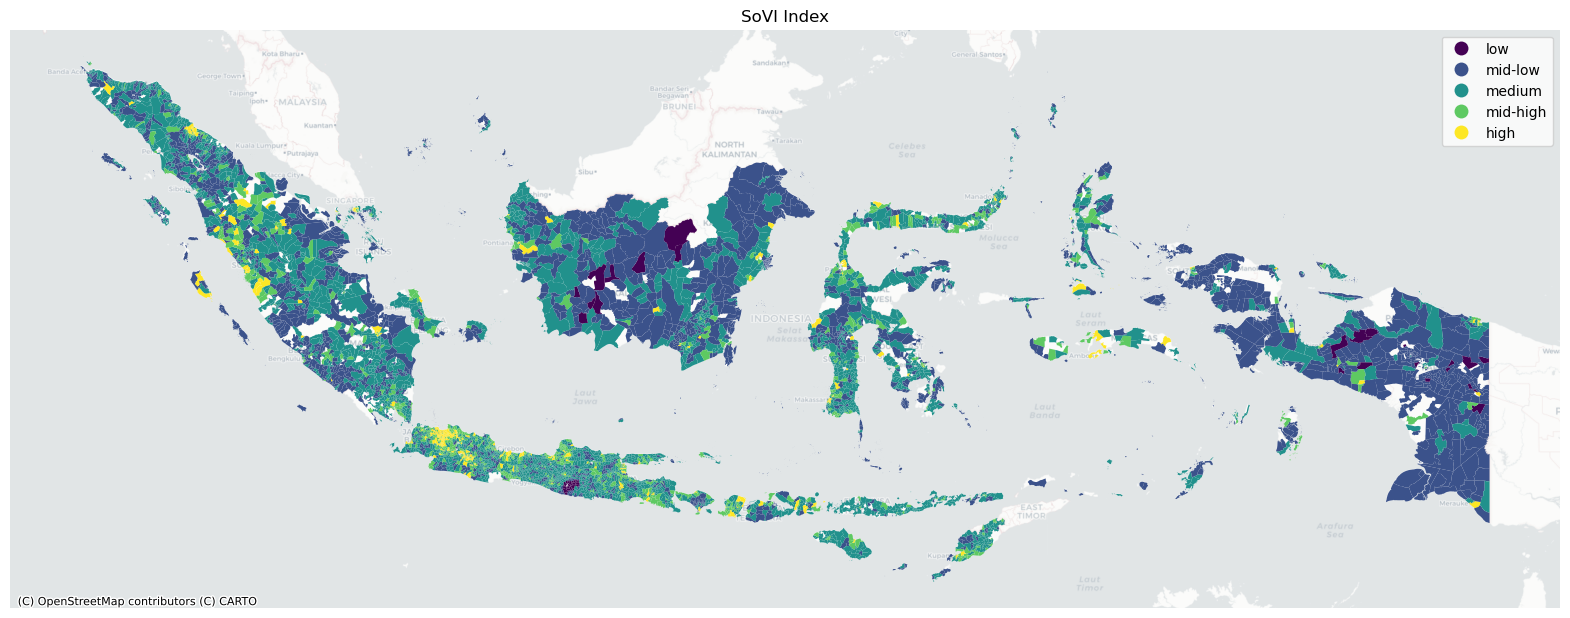

Category Counts:
low           48
mid-low     1942
medium      3078
mid-high     971
high         407
Name: category, dtype: int64


In [15]:
# Define the standard deviation and mean
std_dev = SoVI_geo['normalised_SoVI_score'].std()
mean = SoVI_geo['normalised_SoVI_score'].mean()

# Define the category thresholds
thresholds = [-float("inf"), mean - 1.5 * std_dev, mean - 0.5 * std_dev, mean + 0.5 * std_dev, mean + 1.5 * std_dev, float("inf")]

# Define category labels
labels = ['low', 'mid-low', 'medium', 'mid-high', 'high']

# Categorize the data
SoVI_geo['category'] = pd.cut(SoVI_geo['normalised_SoVI_score'], bins=thresholds, labels=labels)

# Count the number of occurrences for each category
category_counts = SoVI_geo['category'].value_counts()
category_counts = category_counts[['low', 'mid-low', 'medium', 'mid-high', 'high']]

SoVI_geo = SoVI_geo.set_crs(epsg=4326)
SoVI_geo = SoVI_geo.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(20, 10))
SoVI_geo.plot(column='category', cmap='viridis', legend=True, ax=ax)

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, alpha=0.7)

plt.title('SoVI Index')
plt.axis('off')
plt.show()

print("Category Counts:")
print(category_counts)

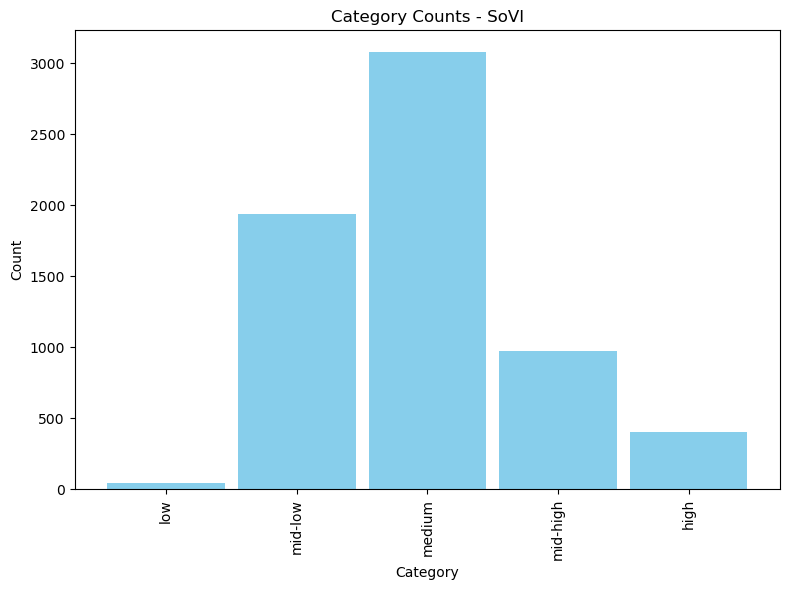

In [16]:
# Creating subplots
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plotting category counts
category_counts.plot(kind='bar', color='skyblue', ax=ax1, width=0.9)  # Adjust the width to make bars stick to each other
ax1.set_title('Category Counts - SoVI')
ax1.set_xlabel('Category')
ax1.set_ylabel('Count')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()